In [17]:
!pip install ordinalgbt shap

In [18]:
from ordinalgbt.lgb import LGBMOrdinal
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from scipy.stats import uniform, loguniform, randint

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import shap
from shap import TreeExplainer
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

from ordinalgbt.data import make_ordinal_classification
from ordinalgbt.lgb import LGBMOrdinal

In [20]:
import warnings
warnings.filterwarnings("ignore")

In [21]:
test_df = pd.read_csv('/Users/liusiyi/Desktop/BT4240/Group Project/dataset/test_data_v3.csv')
valid_df = pd.read_csv('/Users/liusiyi/Desktop/BT4240/Group Project/dataset/validate_data_v3.csv')
train_df = pd.read_csv('/Users/liusiyi/Desktop/BT4240/Group Project/dataset/train_data_v3.csv')

In [22]:
train_df.columns

Index(['Wind_Direction_E', 'Wind_Direction_ENE', 'Wind_Direction_ESE',
       'Wind_Direction_East', 'Wind_Direction_N', 'Wind_Direction_NE',
       'Wind_Direction_NNE', 'Wind_Direction_NNW', 'Wind_Direction_NW',
       'Wind_Direction_North', 'Wind_Direction_S', 'Wind_Direction_SE',
       'Wind_Direction_SSE', 'Wind_Direction_SSW', 'Wind_Direction_SW',
       'Wind_Direction_South', 'Wind_Direction_VAR', 'Wind_Direction_Variable',
       'Wind_Direction_W', 'Wind_Direction_WNW', 'Wind_Direction_WSW',
       'Wind_Direction_West', 'Weather_Day_of_Week_Monday',
       'Weather_Day_of_Week_Saturday', 'Weather_Day_of_Week_Sunday',
       'Weather_Day_of_Week_Thursday', 'Weather_Day_of_Week_Tuesday',
       'Weather_Day_of_Week_Wednesday', 'End_Time', 'Distance(mi)',
       'Temperature(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Station', 'Stop',


In [23]:
train_df.dtypes

Wind_Direction_E       float64
Wind_Direction_ENE     float64
Wind_Direction_ESE     float64
Wind_Direction_East    float64
Wind_Direction_N       float64
                        ...   
Weather_Year             int64
Weather_Month            int64
Weather_Day              int64
Weather_Hour             int64
Severity                 int64
Length: 69, dtype: object

In [24]:
train_df.head()

,Wind_Direction_E,Wind_Direction_ENE,Wind_Direction_ESE,Wind_Direction_East,Wind_Direction_N,Wind_Direction_NE,Wind_Direction_NNE,Wind_Direction_NNW,Wind_Direction_NW,Wind_Direction_North,...,Weather_Condition_Encoded,Weather_Condition_Fog / Low Visibility,Weather_Condition_Others,Weather_Condition_Snow,Weather_Condition_Thunderstorms / Severe Weather,Weather_Year,Weather_Month,Weather_Day,Weather_Hour,Severity
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,2022,8,3,5,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,2020,6,3,14,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,2022,8,11,9,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,2022,7,25,7,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,2020,5,20,15,1


In [25]:
train_X = train_df.drop(columns=['Severity'],inplace=False)
train_y = train_df['Severity']
valid_X = valid_df.drop(columns=['Severity'],inplace=False)
valid_y = valid_df['Severity']
test_X = test_df.drop(columns=['Severity'],inplace=False)
test_y = test_df['Severity']

In [26]:
print(train_X.shape)
print(test_X.shape)

(8000, 68)
(1000, 68)


In [27]:
print(train_y)

0       1
1       1
2       1
3       1
4       1
       ..
7995    4
7996    4
7997    4
7998    4
7999    4
Name: Severity, Length: 8000, dtype: int64


In [28]:
encoder = LabelEncoder()
train_y1 = encoder.fit_transform(train_y)
valid_y1 = encoder.transform(valid_y)
test_y1 = encoder.transform(test_y)


train_y1

array([0, 0, 0, ..., 3, 3, 3])

# Baseline Model

In [29]:
model = LGBMOrdinal()
model.fit(train_X, train_y1)

LGBMOrdinal(objective=<function LGBMOrdinal._lgb_loss_factory.<locals>.loss at 0x286602dd0>)

In [30]:
y_pred = model.predict(valid_X)
y_pred_prob = model.predict_proba(valid_X)

## Model Evaluation

### Confusion Matrix

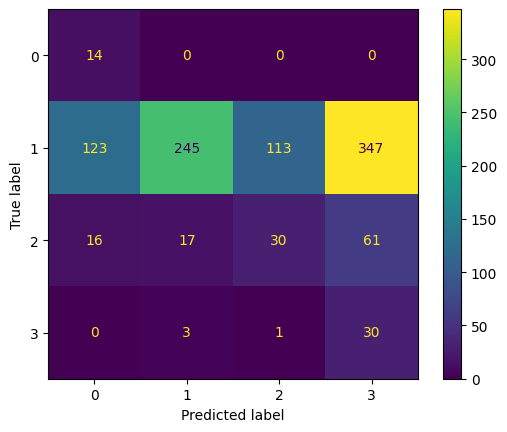

In [31]:
ConfusionMatrixDisplay.from_predictions(valid_y1, y_pred)

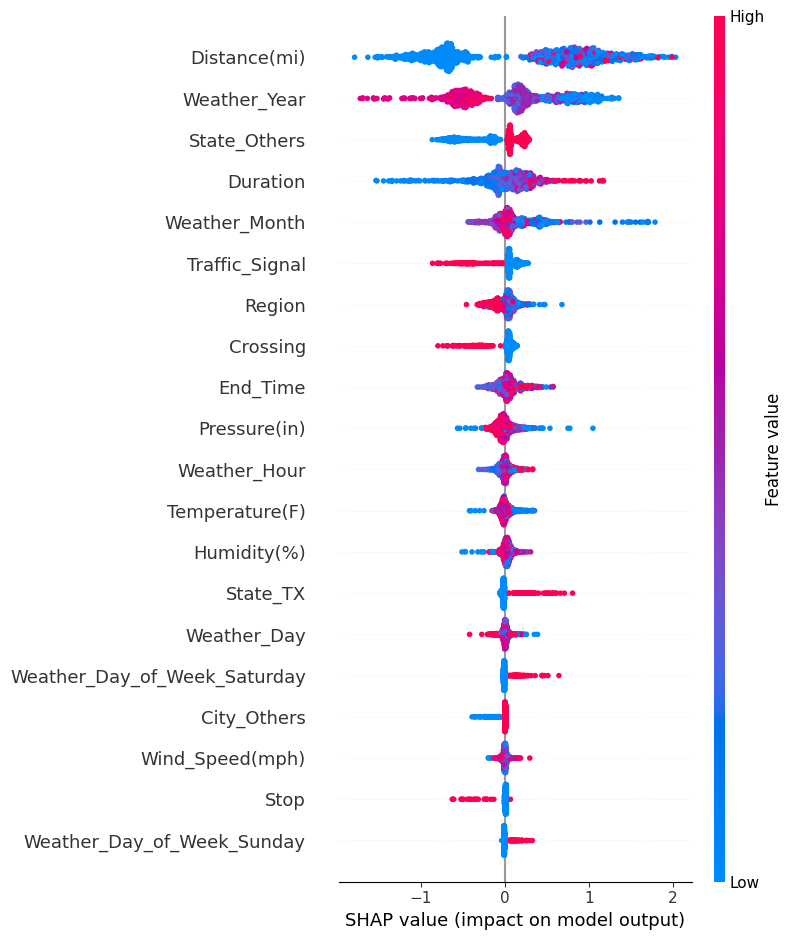

In [32]:
explainer = TreeExplainer(model, model_output='raw')
shap_values = explainer.shap_values(valid_X)
shap.summary_plot(shap_values,valid_X)

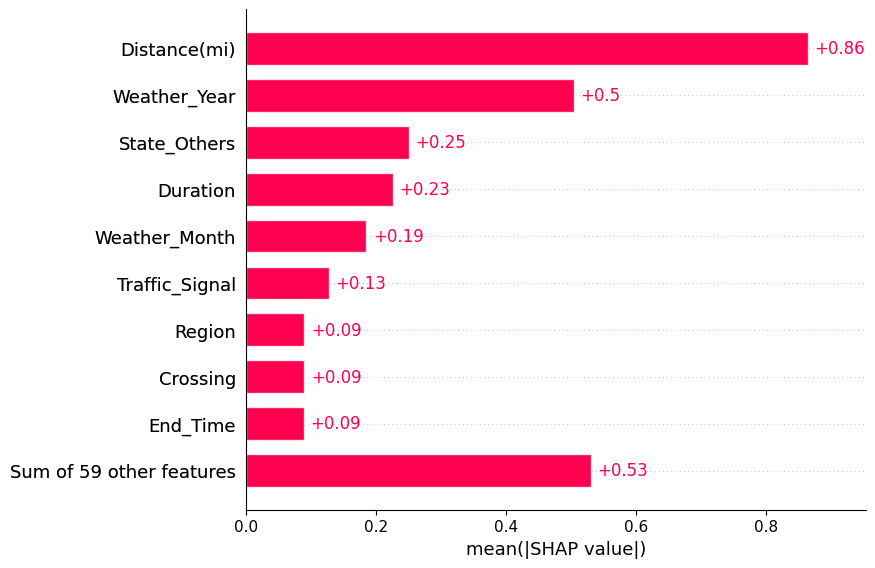

In [33]:
shap_values = explainer(valid_X)
shap.plots.bar(shap_values)

### Mean Average Error

In [34]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, f1_score, cohen_kappa_score, classification_report, accuracy_score
from scipy.stats import kendalltau

In [35]:

accuracy = accuracy_score(valid_y1, y_pred)
tolerance_accuracy = np.mean(np.abs(valid_y1 - y_pred) <= 1)
f1_macro = f1_score(valid_y1, y_pred, average="macro")
f1_weighted = f1_score(valid_y1, y_pred, average="weighted")
tau, _ = kendalltau(valid_y1, y_pred)
kappa_weighted = cohen_kappa_score(valid_y1, y_pred, weights="quadratic")


print("Accuracy:", accuracy)
print("Accuracy within 1 class:", tolerance_accuracy)
print("F1-score (Macro):", f1_macro)
print("F1-score (Weighted):", f1_weighted)
print("Kendall's Tau:", tau)
print("Weighted Kappa:", kappa_weighted)
print(classification_report(valid_y1, y_pred))

Accuracy: 0.319
Accuracy within 1 class: 0.634
F1-score (Macro): 0.24174283063434474
F1-score (Weighted): 0.4056290694564442
Kendall's Tau: 0.17558071219841245
Weighted Kappa: 0.11683581982854996
              precision    recall  f1-score   support

           0       0.09      1.00      0.17        14
           1       0.92      0.30      0.45       828
           2       0.21      0.24      0.22       124
           3       0.07      0.88      0.13        34

    accuracy                           0.32      1000
   macro avg       0.32      0.61      0.24      1000
weighted avg       0.79      0.32      0.41      1000



### ROC

In [36]:
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

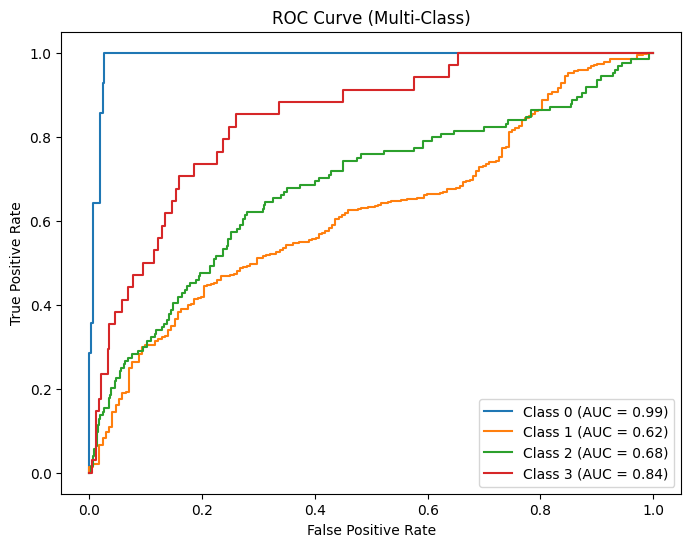

In [37]:
y_true_bin = label_binarize(valid_y1, classes=np.unique(valid_y1))

n_classes = y_true_bin.shape[1]
plt.figure(figsize=(8,6))

for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_true_bin[:, i], y_pred_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"Class {i} (AUC = {roc_auc:.2f})")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (Multi-Class)")
plt.legend()
plt.show()

Accuracy: 0.309
Accuracy within 1 class: 0.626
F1-score (Macro): 0.19887905911155784
F1-score (Weighted): 0.4230083689432693
Kendall's Tau: 0.1424863178334119
Weighted Kappa: 0.07857831425446449
              precision    recall  f1-score   support

           0       0.04      1.00      0.08         6
           1       0.96      0.31      0.47       857
           2       0.17      0.20      0.18       119
           3       0.03      0.83      0.07        18

    accuracy                           0.31      1000
   macro avg       0.30      0.59      0.20      1000
weighted avg       0.84      0.31      0.42      1000



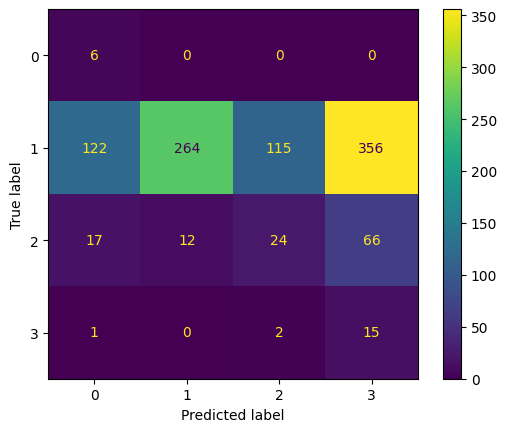

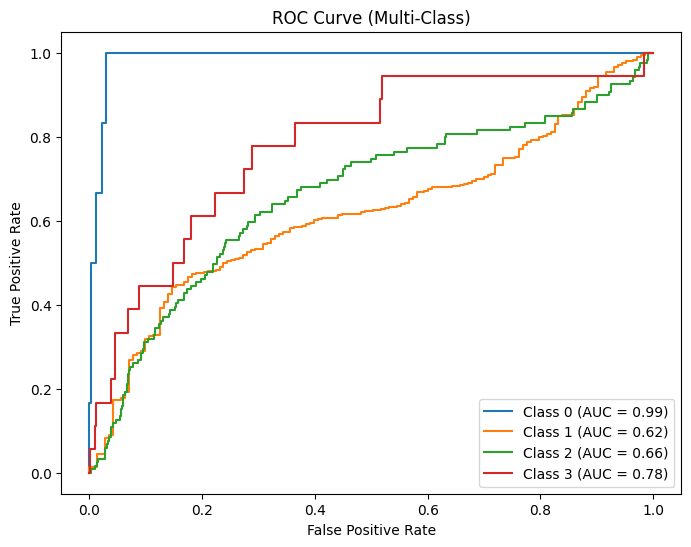

In [38]:
y_pred = model.predict(test_X)
y_pred_prob = model.predict_proba(test_X)

accuracy = accuracy_score(test_y1, y_pred)
tolerance_accuracy = np.mean(np.abs(test_y1 - y_pred) <= 1)
f1_macro = f1_score(test_y1, y_pred, average="macro")
f1_weighted = f1_score(test_y1, y_pred, average="weighted")
tau, _ = kendalltau(test_y1, y_pred)
kappa_weighted = cohen_kappa_score(test_y1, y_pred, weights="quadratic")


print("Accuracy:", accuracy)
print("Accuracy within 1 class:", tolerance_accuracy)
print("F1-score (Macro):", f1_macro)
print("F1-score (Weighted):", f1_weighted)
print("Kendall's Tau:", tau)
print("Weighted Kappa:", kappa_weighted)
print(classification_report(test_y1, y_pred))

ConfusionMatrixDisplay.from_predictions(test_y1, y_pred)

y_true_bin = label_binarize(test_y1, classes=np.unique(test_y1))

n_classes = y_true_bin.shape[1]
plt.figure(figsize=(8,6))

for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_true_bin[:, i], y_pred_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"Class {i} (AUC = {roc_auc:.2f})")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (Multi-Class)")
plt.legend()
plt.show()

# Evaluate In sample performance

Accuracy: 0.62925
Accuracy within 1 class: 0.885
F1-score (Macro): 0.5871905141482677
F1-score (Weighted): 0.5871905141482677
Kendall's Tau: 0.7082339938232002
Weighted Kappa: 0.7565071023893587
              precision    recall  f1-score   support

           0       0.77      0.97      0.86      2000
           1       0.72      0.35      0.48      2000
           2       0.58      0.24      0.34      2000
           3       0.52      0.94      0.67      2000

    accuracy                           0.63      8000
   macro avg       0.65      0.63      0.59      8000
weighted avg       0.65      0.63      0.59      8000



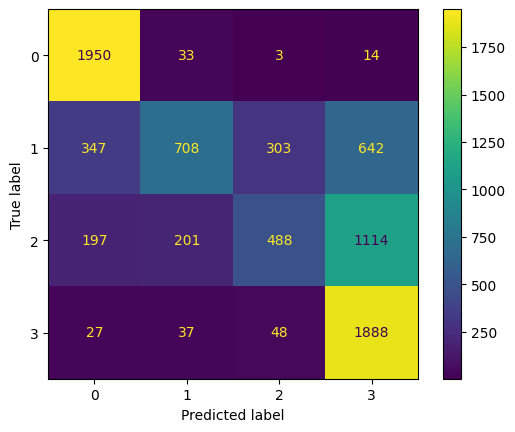

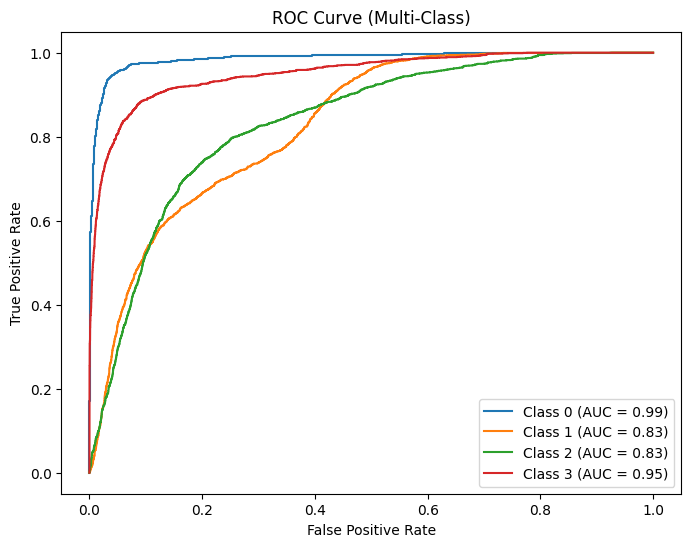

In [39]:
y_pred = model.predict(train_X)
y_pred_prob = model.predict_proba(train_X)

accuracy = accuracy_score(train_y1, y_pred)
tolerance_accuracy = np.mean(np.abs(train_y1 - y_pred) <= 1)
f1_macro = f1_score(train_y1, y_pred, average="macro")
f1_weighted = f1_score(train_y1, y_pred, average="weighted")
tau, _ = kendalltau(train_y1, y_pred)
kappa_weighted = cohen_kappa_score(train_y1, y_pred, weights="quadratic")


print("Accuracy:", accuracy)
print("Accuracy within 1 class:", tolerance_accuracy)
print("F1-score (Macro):", f1_macro)
print("F1-score (Weighted):", f1_weighted)
print("Kendall's Tau:", tau)
print("Weighted Kappa:", kappa_weighted)
print(classification_report(train_y1, y_pred))

ConfusionMatrixDisplay.from_predictions(train_y1, y_pred)

y_true_bin = label_binarize(train_y1, classes=np.unique(train_y1))

n_classes = y_true_bin.shape[1]
plt.figure(figsize=(8,6))

for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_true_bin[:, i], y_pred_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"Class {i} (AUC = {roc_auc:.2f})")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (Multi-Class)")
plt.legend()
plt.show()

# Fine-tuning

In [40]:
!pip install scikit-optimize

In [41]:
from sklearn.model_selection import KFold, StratifiedKFold, RandomizedSearchCV, GridSearchCV
from skopt import BayesSearchCV
from skopt.callbacks import DeadlineStopper, DeltaYStopper
from skopt.space import Real, Categorical, Integer

# from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import make_scorer, cohen_kappa_score

In [42]:
def evaluate_results(y_pred, y_pred_prob, y_true):
    

    accuracy = accuracy_score(y_true, y_pred)
    tolerance_accuracy = np.mean(np.abs(y_true - y_pred) <= 1)
    f1_macro = f1_score(y_true, y_pred, average="macro")
    f1_weighted = f1_score(y_true, y_pred, average="weighted")
    tau, _ = kendalltau(y_true, y_pred)
    kappa_weighted = cohen_kappa_score(y_true, y_pred, weights="quadratic")



    print("Accuracy:", accuracy)
    print("Accuracy within 1 class:", tolerance_accuracy)
    print("F1-score (Macro):", f1_macro)
    print("F1-score (Weighted):", f1_weighted)
    print("Kendall's Tau:", tau)
    print("Weighted Kappa:", kappa_weighted)
    print(classification_report(y_true, y_pred))

    ConfusionMatrixDisplay.from_predictions(y_true, y_pred)

    y_true_bin = label_binarize(y_true, classes=np.unique(y_true))

    n_classes = y_true_bin.shape[1]
    plt.figure(figsize=(8,6))

    for i in range(n_classes):
        fpr, tpr, _ = roc_curve(y_true_bin[:, i], y_pred_prob[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f"Class {i} (AUC = {roc_auc:.2f})")

    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve (Multi-Class)")
    plt.legend()
    plt.show()

def tune_evaluate(scoring, search_spaces, train_X, train_y, test_X, test_y):
    model = LGBMOrdinal()
    opt = BayesSearchCV(estimator=model,                                    
                    search_spaces=search_spaces,                      
                    scoring=scoring,                           
                    cv=5,                                           
                    n_iter=60,
                    n_points=3,
                    n_jobs=-1,
                    iid=False,
                    return_train_score=False,                         
                    refit=True,                                      
                    optimizer_kwargs={'base_estimator': 'GP'},        
                    random_state=42)
    
    opt.fit(train_X, train_y)
    best_model = opt.best_estimator_
    print("Best optimzer score: ", opt.best_score_)
    print("Best parameters: ", opt.best_params_)

    print("######### Evaluate Test Data Fit #########")
    y_pred = best_model.predict(test_X)
    y_pred_prob = best_model.predict_proba(test_X)

    evaluate_results(y_pred, y_pred_prob, test_y)

    print("######### Evaluate Train Data Fit #########")
    y_pred = best_model.predict(train_X)
    y_pred_prob = best_model.predict_proba(train_X)

    evaluate_results(y_pred, y_pred_prob, train_y)

    return best_model, opt.best_params_
    

In [43]:
def random_search_evaluate(search_spaces, train_X, train_y, test_X, test_y):
    model = LGBMOrdinal()
    random_search = RandomizedSearchCV(model, param_distributions=search_spaces, n_iter=20, cv=5, scoring="accuracy", random_state=42)
    random_search.fit(train_X, train_y)
    
    best_model = random_search.best_estimator_
    print("Best parameters: ", random_search.best_params_)

    y_pred = best_model.predict(test_X)
    y_pred_prob = best_model.predict_proba(test_X)

    evaluate_results(y_pred, y_pred_prob, test_y)

    return best_model, random_search.best_params_

In [44]:
def grid_search_evaluate(search_spaces, train_X, train_y, test_X, test_y):
    model = LGBMOrdinal()
    grid_search = GridSearchCV(model, param_grid=search_spaces, cv=5, scoring="accuracy")
    grid_search.fit(train_X, train_y)
    
    best_model = grid_search.best_estimator_
    print("Best parameters: ", grid_search.best_params_)

    y_pred = best_model.predict(test_X)
    y_pred_prob = best_model.predict_proba(test_X)

    evaluate_results(y_pred, y_pred_prob, test_y)

    return best_model, grid_search.best_params_

## F1

/Users/liusiyi/Desktop/BT4240/Group Project/.venv/lib/python3.10/site-packages/ordinalgbt/loss.py:70: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
/Users/liusiyi/Desktop/BT4240/Group Project/.venv/lib/python3.10/site-packages/ordinalgbt/loss.py:70: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
/Users/liusiyi/Desktop/BT4240/Group Project/.venv/lib/python3.10/site-packages/ordinalgbt/loss.py:70: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
/Users/liusiyi/Desktop/BT4240/Group Project/.venv/lib/python3.10/site-packages/ordinalgbt/loss.py:70: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
/Users/liusiyi/Desktop/BT4240/Group Project/.venv/lib/python3.10/site-packages/ordinalgbt/loss.py:70: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
/Users/liusiyi/Desktop/BT4240/Group Project/.venv/lib/python3.10/site-packages/ordinalgbt/loss.py:70: RuntimeWarning: ov

Best optimzer score:  0.15235468325546683
Best parameters:  OrderedDict([('colsample_bytree', 1.0), ('learning_rate', 1.0), ('max_depth', 235), ('n_estimators', 5000), ('num_leaves', 243), ('reg_alpha', 0.5), ('reg_lambda', 0.5), ('subsample', 1.0), ('subsample_freq', 1)])
######### Evaluate Test Data Fit #########
Accuracy: 0.3
Accuracy within 1 class: 0.7
F1-score (Macro): 0.21775071708223454
F1-score (Weighted): 0.38189177291115045
Kendall's Tau: 0.1001644398703425
Weighted Kappa: 0.08405736417879195
              precision    recall  f1-score   support

           0       0.07      1.00      0.13        14
           1       0.87      0.28      0.42       828
           2       0.16      0.27      0.20       124
           3       0.06      0.62      0.12        34

    accuracy                           0.30      1000
   macro avg       0.29      0.54      0.22      1000
weighted avg       0.75      0.30      0.38      1000



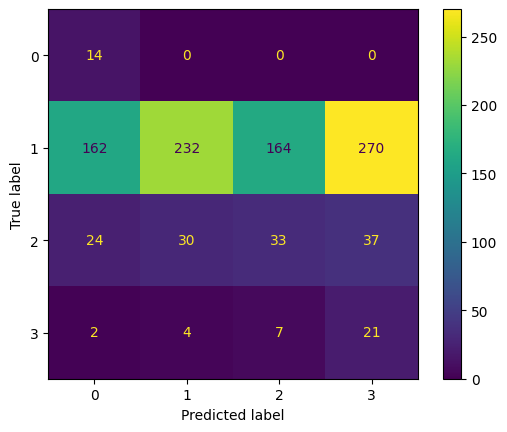

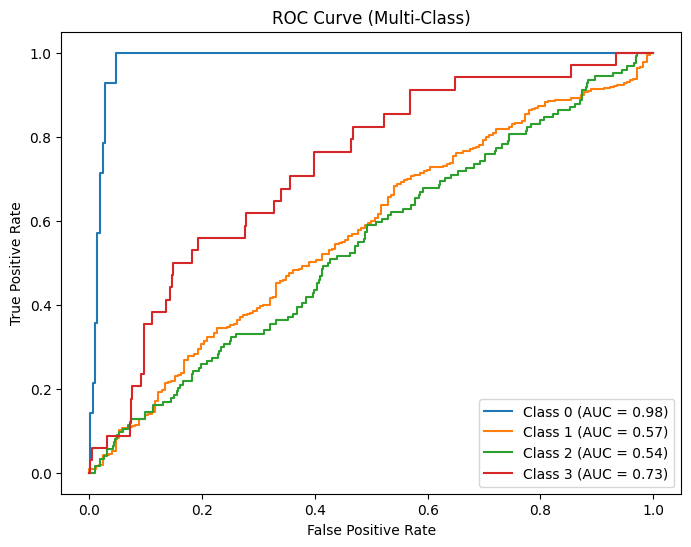

######### Evaluate Train Data Fit #########
Accuracy: 0.999625
Accuracy within 1 class: 1.0
F1-score (Macro): 0.9996250312343771
F1-score (Weighted): 0.999625031234377
Kendall's Tau: 0.9997500208281257
Weighted Kappa: 0.99985
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2000
           1       1.00      1.00      1.00      2000
           2       1.00      1.00      1.00      2000
           3       1.00      1.00      1.00      2000

    accuracy                           1.00      8000
   macro avg       1.00      1.00      1.00      8000
weighted avg       1.00      1.00      1.00      8000



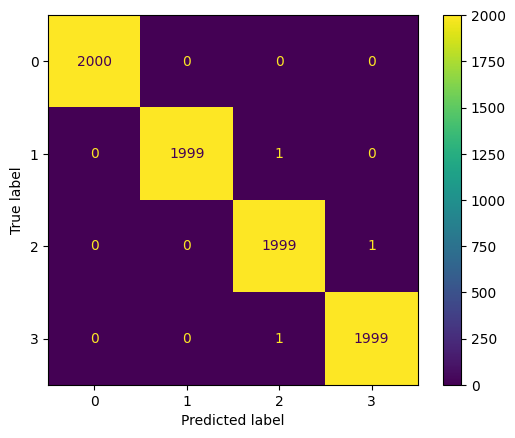

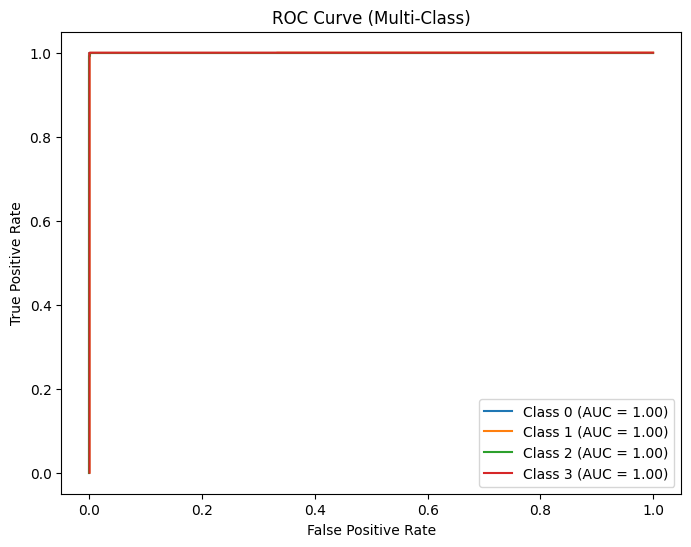

In [ ]:

scoring_f1 = make_scorer(f1_score, average="macro", greater_is_better=True)
scoring_qwk = make_scorer(cohen_kappa_score, weights='quadratic')


search_spaces = {
    'learning_rate': Real(0.01, 1.0, 'log-uniform'),
    'n_estimators': Integer(30, 5000),
    'num_leaves': Integer(2, 512),                       # Maximum tree leaves for base learners
    'max_depth': Integer(-1, 256),                       # Maximum tree depth for base learners, <=0 means no limit
    'subsample': Real(0.01, 1.0, 'uniform'),             # Subsample ratio of the training instance
    'subsample_freq': Integer(1, 10),                    # Frequency of subsample, <=0 means no enable
    'colsample_bytree': Real(0.01, 1.0, 'uniform'),      # Subsample ratio of columns when constructing each tree
    'reg_lambda': Real(0.5, 100.0, 'log-uniform'),      # L2 regularization
    'reg_alpha': Real(0.5, 100.0, 'log-uniform'),       # L1 regularization
   }

best_model_f1_1, best_params_f1_1 = tune_evaluate(scoring_f1, search_spaces, train_X, train_y1, valid_X, valid_y1)

/Users/liusiyi/Desktop/BT4240/Group Project/.venv/lib/python3.10/site-packages/ordinalgbt/loss.py:70: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
/Users/liusiyi/Desktop/BT4240/Group Project/.venv/lib/python3.10/site-packages/ordinalgbt/loss.py:70: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
/Users/liusiyi/Desktop/BT4240/Group Project/.venv/lib/python3.10/site-packages/ordinalgbt/loss.py:70: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
/Users/liusiyi/Desktop/BT4240/Group Project/.venv/lib/python3.10/site-packages/ordinalgbt/loss.py:70: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
/Users/liusiyi/Desktop/BT4240/Group Project/.venv/lib/python3.10/site-packages/ordinalgbt/loss.py:70: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
/Users/liusiyi/Desktop/BT4240/Group Project/.venv/lib/python3.10/site-packages/ordinalgbt/loss.py:70: RuntimeWarning: ov

Best optimzer score:  0.16840025842080988
Best parameters:  OrderedDict([('colsample_bytree', 0.884131922535774), ('learning_rate', 0.47179855894155565), ('max_depth', 256), ('n_estimators', 5000), ('num_leaves', 316), ('reg_alpha', 1e-09), ('reg_lambda', 1e-09), ('subsample', 1.0), ('subsample_freq', 5)])
######### Evaluate Test Data Fit #########
Accuracy: 0.262
Accuracy within 1 class: 0.588
F1-score (Macro): 0.21899955843759614
F1-score (Weighted): 0.3245039477763305
Kendall's Tau: 0.05695004489047462
Weighted Kappa: 0.059215692985808976
              precision    recall  f1-score   support

           0       0.09      1.00      0.16        14
           1       0.86      0.22      0.35       828
           2       0.20      0.28      0.23       124
           3       0.07      0.94      0.13        34

    accuracy                           0.26      1000
   macro avg       0.31      0.61      0.22      1000
weighted avg       0.74      0.26      0.32      1000



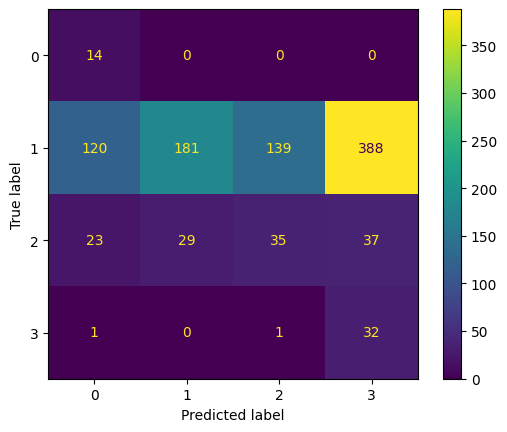

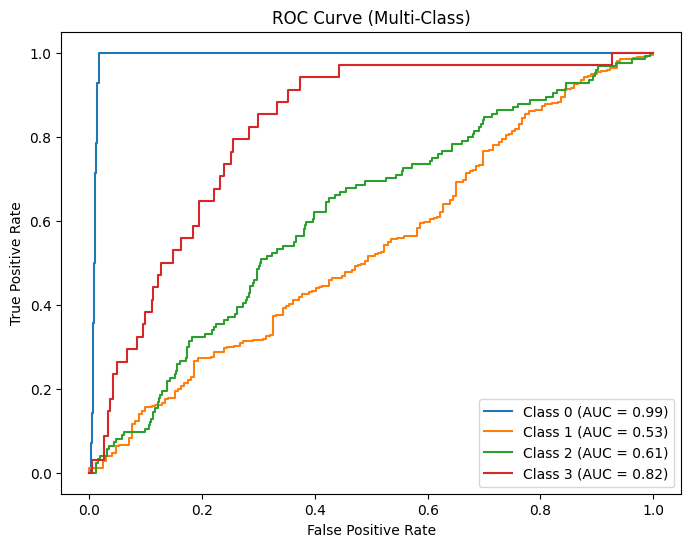

######### Evaluate Train Data Fit #########
Accuracy: 0.99975
Accuracy within 1 class: 1.0
F1-score (Macro): 0.9997500312109512
F1-score (Weighted): 0.9997500312109511
Kendall's Tau: 0.9998333541562533
Weighted Kappa: 0.9998999899989999
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2000
           1       1.00      1.00      1.00      2000
           2       1.00      1.00      1.00      2000
           3       1.00      1.00      1.00      2000

    accuracy                           1.00      8000
   macro avg       1.00      1.00      1.00      8000
weighted avg       1.00      1.00      1.00      8000



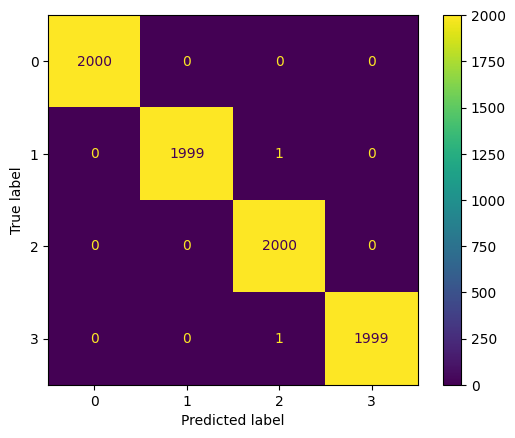

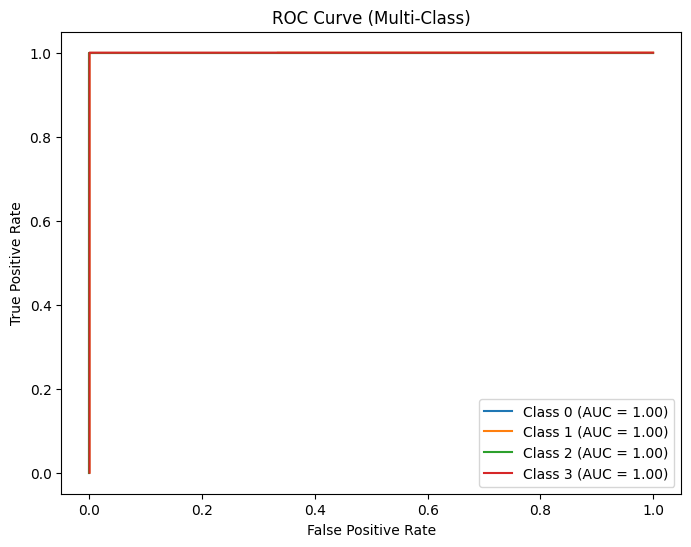

In [ ]:
# search_spaces = {
#     'learning_rate': Real(0.01, 1.0, 'log-uniform'),
#     'n_estimators': Integer(30, 5000),
#     'num_leaves': Integer(2, 512),                       # Maximum tree leaves for base learners
#     'max_depth': Integer(-1, 256),                       # Maximum tree depth for base learners, <=0 means no limit
#     'subsample': Real(0.01, 1.0, 'uniform'),             # Subsample ratio of the training instance
#     'subsample_freq': Integer(1, 10),                    # Frequency of subsample, <=0 means no enable
#     'colsample_bytree': Real(0.01, 1.0, 'uniform'),      # Subsample ratio of columns when constructing each tree
#     'reg_lambda': Real(1e-9, 100.0, 'log-uniform'),      # L2 regularization
#     'reg_alpha': Real(1e-9, 100.0, 'log-uniform'),       # L1 regularization
#    }

# best_model, best_params = tune_evaluate(scoring_f1, search_spaces, train_X, train_y1, valid_X, valid_y1)

## Weighted F1

/Users/liusiyi/Desktop/BT4240/Group Project/.venv/lib/python3.10/site-packages/ordinalgbt/loss.py:70: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
/Users/liusiyi/Desktop/BT4240/Group Project/.venv/lib/python3.10/site-packages/ordinalgbt/loss.py:70: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
/Users/liusiyi/Desktop/BT4240/Group Project/.venv/lib/python3.10/site-packages/ordinalgbt/loss.py:70: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
/Users/liusiyi/Desktop/BT4240/Group Project/.venv/lib/python3.10/site-packages/ordinalgbt/loss.py:70: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
/Users/liusiyi/Desktop/BT4240/Group Project/.venv/lib/python3.10/site-packages/ordinalgbt/loss.py:70: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
/Users/liusiyi/Desktop/BT4240/Group Project/.venv/lib/python3.10/site-packages/ordinalgbt/loss.py:70: RuntimeWarning: ov

Best optimzer score:  0.15235468325546683
Best parameters:  OrderedDict([('colsample_bytree', 1.0), ('learning_rate', 1.0), ('max_depth', 235), ('n_estimators', 5000), ('num_leaves', 243), ('reg_alpha', 0.5), ('reg_lambda', 0.5), ('subsample', 1.0), ('subsample_freq', 1)])
######### Evaluate Test Data Fit #########
Accuracy: 0.3
Accuracy within 1 class: 0.7
F1-score (Macro): 0.21775071708223454
F1-score (Weighted): 0.38189177291115045
Kendall's Tau: 0.1001644398703425
Weighted Kappa: 0.08405736417879195
              precision    recall  f1-score   support

           0       0.07      1.00      0.13        14
           1       0.87      0.28      0.42       828
           2       0.16      0.27      0.20       124
           3       0.06      0.62      0.12        34

    accuracy                           0.30      1000
   macro avg       0.29      0.54      0.22      1000
weighted avg       0.75      0.30      0.38      1000



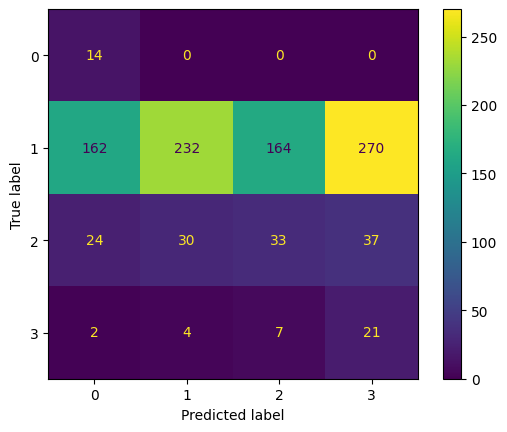

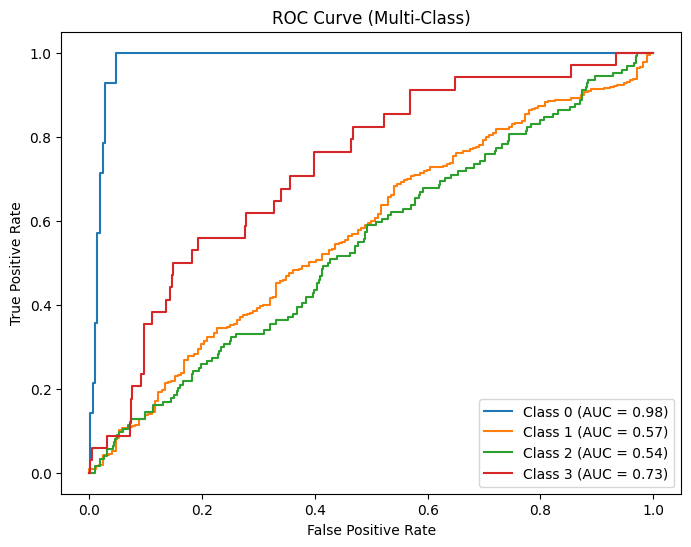

######### Evaluate Train Data Fit #########
Accuracy: 0.999625
Accuracy within 1 class: 1.0
F1-score (Macro): 0.9996250312343771
F1-score (Weighted): 0.999625031234377
Kendall's Tau: 0.9997500208281257
Weighted Kappa: 0.99985
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2000
           1       1.00      1.00      1.00      2000
           2       1.00      1.00      1.00      2000
           3       1.00      1.00      1.00      2000

    accuracy                           1.00      8000
   macro avg       1.00      1.00      1.00      8000
weighted avg       1.00      1.00      1.00      8000



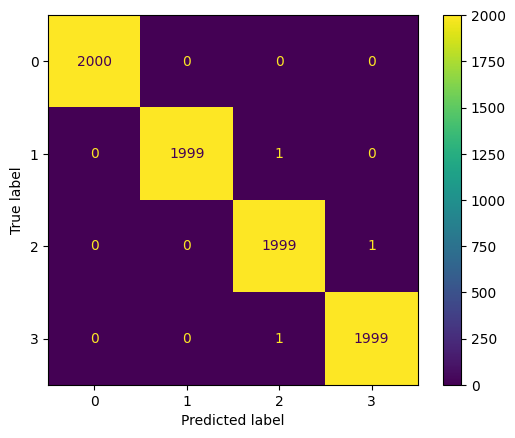

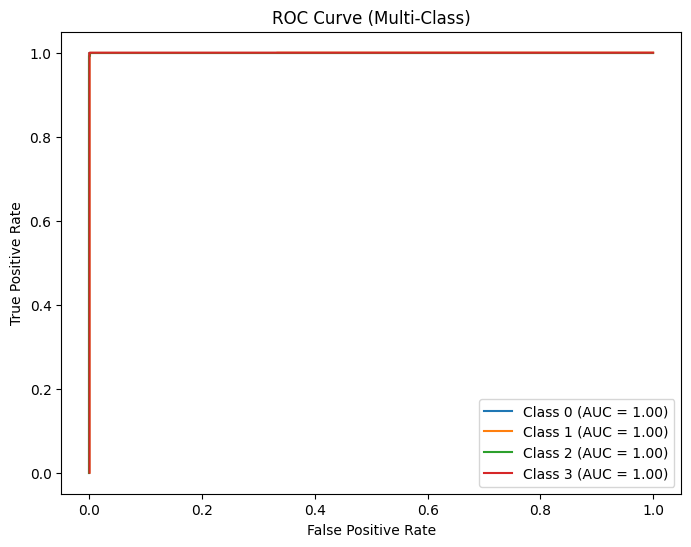

In [62]:
scoring_f1_weighted = make_scorer(f1_score, average="weighted", greater_is_better=True)
best_model, best_params = tune_evaluate(scoring_f1, search_spaces, train_X, train_y1, valid_X, valid_y1)

## QWK

## Mean Squared Error

Best optimzer score:  -1.53175
Best parameters:  OrderedDict([('colsample_bytree', 1.0), ('learning_rate', 0.8389367929885553), ('max_depth', 137), ('n_estimators', 1404), ('num_leaves', 311), ('reg_alpha', 14.709900732508682), ('reg_lambda', 0.8698434487970176), ('subsample', 1.0), ('subsample_freq', 5)])
######### Evaluate Test Data Fit #########
Accuracy: 0.47
Accuracy within 1 class: 0.761
F1-score (Macro): 0.33982253008393165
F1-score (Weighted): 0.5500369784609161
Kendall's Tau: 0.17999742320921758
Weighted Kappa: 0.15022310902494407
              precision    recall  f1-score   support

           0       0.16      1.00      0.28        14
           1       0.92      0.46      0.61       828
           2       0.22      0.39      0.28       124
           3       0.11      0.88      0.19        34

    accuracy                           0.47      1000
   macro avg       0.35      0.68      0.34      1000
weighted avg       0.79      0.47      0.55      1000



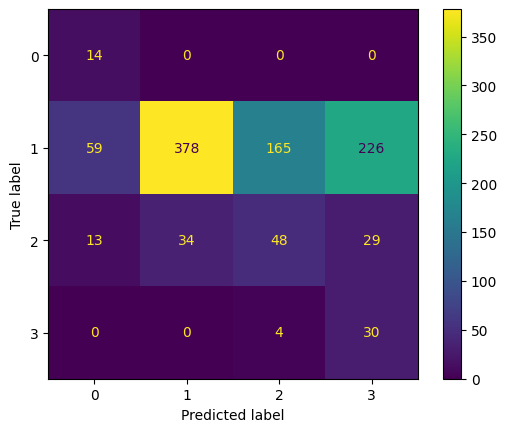

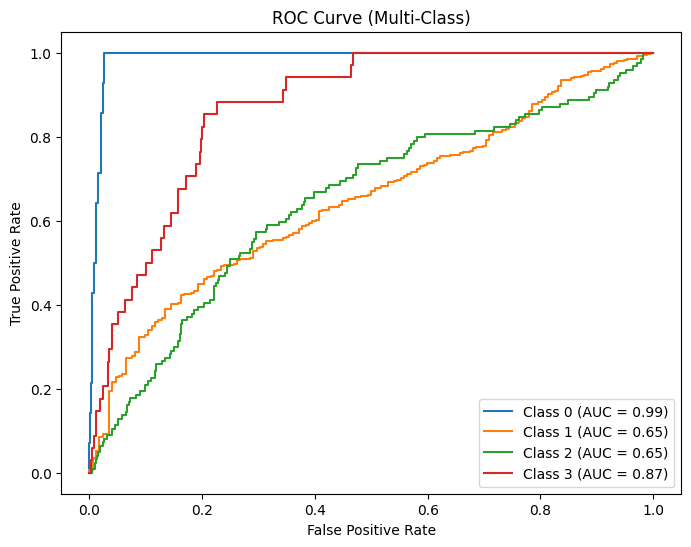

######### Evaluate Train Data Fit #########
Accuracy: 0.68725
Accuracy within 1 class: 0.919
F1-score (Macro): 0.6742592985102521
F1-score (Weighted): 0.6742592985102521
Kendall's Tau: 0.725651532043745
Weighted Kappa: 0.7869565217391304
              precision    recall  f1-score   support

           0       0.86      0.91      0.89      2000
           1       0.60      0.55      0.57      2000
           2       0.60      0.42      0.49      2000
           3       0.65      0.88      0.75      2000

    accuracy                           0.69      8000
   macro avg       0.68      0.69      0.67      8000
weighted avg       0.68      0.69      0.67      8000



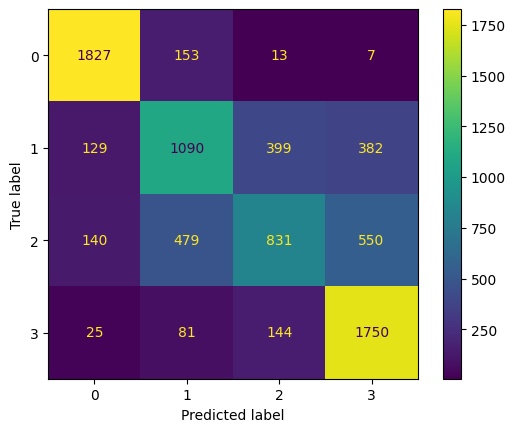

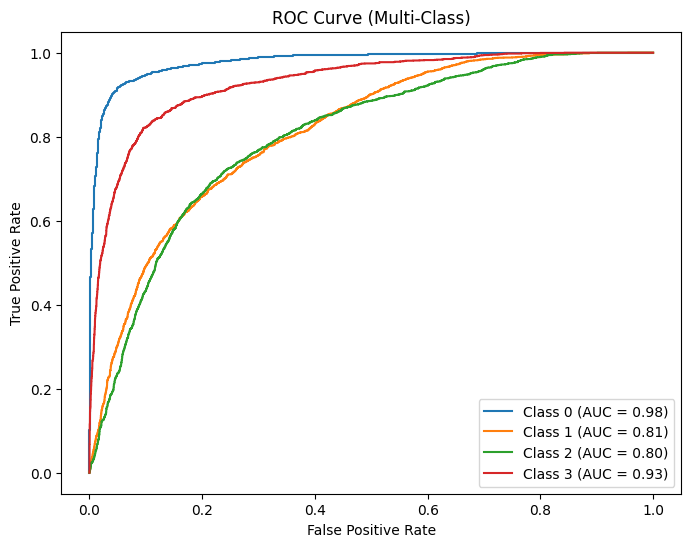

In [ ]:
scoring_mse = make_scorer(mean_squared_error, greater_is_better=False)
best_model_mse1, best_params_mse1 = tune_evaluate(scoring_mse, search_spaces, train_X, train_y1, valid_X, valid_y1)

## Mean Absoute Error

Best optimzer score:  -1.00275
Best parameters:  OrderedDict([('colsample_bytree', 0.8815166792341159), ('learning_rate', 0.9764443329321615), ('max_depth', 84), ('n_estimators', 5000), ('num_leaves', 134), ('reg_alpha', 5.427963172135716), ('reg_lambda', 0.8136614265201028), ('subsample', 1.0), ('subsample_freq', 9)])
######### Evaluate Test Data Fit #########
Accuracy: 0.343
Accuracy within 1 class: 0.706
F1-score (Macro): 0.23636892448144717
F1-score (Weighted): 0.42835639291138383
Kendall's Tau: 0.09133906780587378
Weighted Kappa: 0.07972378558221971
              precision    recall  f1-score   support

           0       0.10      1.00      0.18        14
           1       0.85      0.34      0.49       828
           2       0.12      0.20      0.15       124
           3       0.07      0.65      0.12        34

    accuracy                           0.34      1000
   macro avg       0.29      0.55      0.24      1000
weighted avg       0.72      0.34      0.43      1000



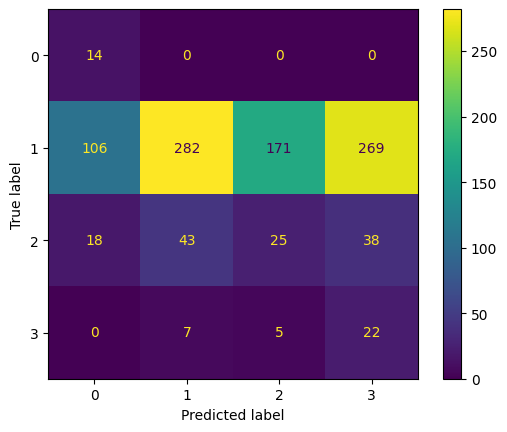

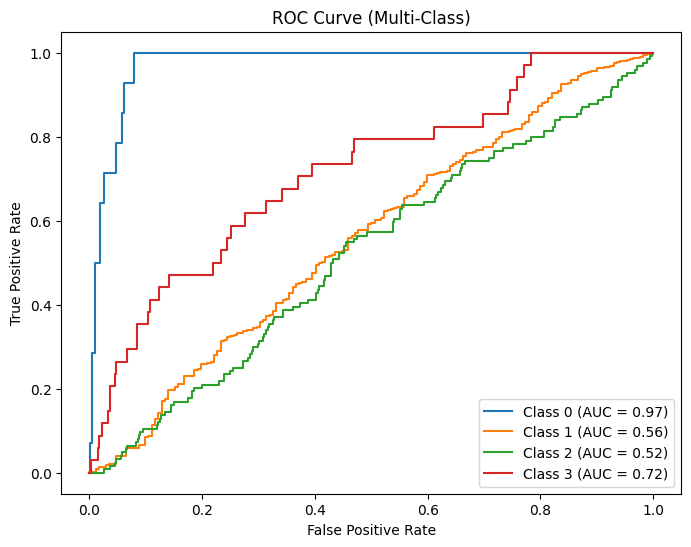

######### Evaluate Train Data Fit #########
Accuracy: 0.899
Accuracy within 1 class: 0.99675
F1-score (Macro): 0.8951347859289994
F1-score (Weighted): 0.8951347859289994
Kendall's Tau: 0.934292365299763
Weighted Kappa: 0.9569727237802536
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      2000
           1       0.88      0.92      0.90      2000
           2       0.92      0.69      0.79      2000
           3       0.84      0.99      0.91      2000

    accuracy                           0.90      8000
   macro avg       0.90      0.90      0.90      8000
weighted avg       0.90      0.90      0.90      8000



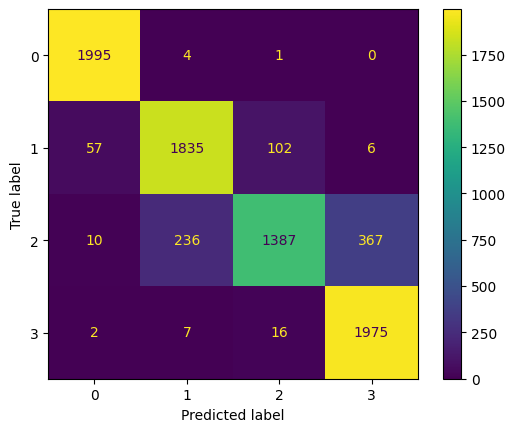

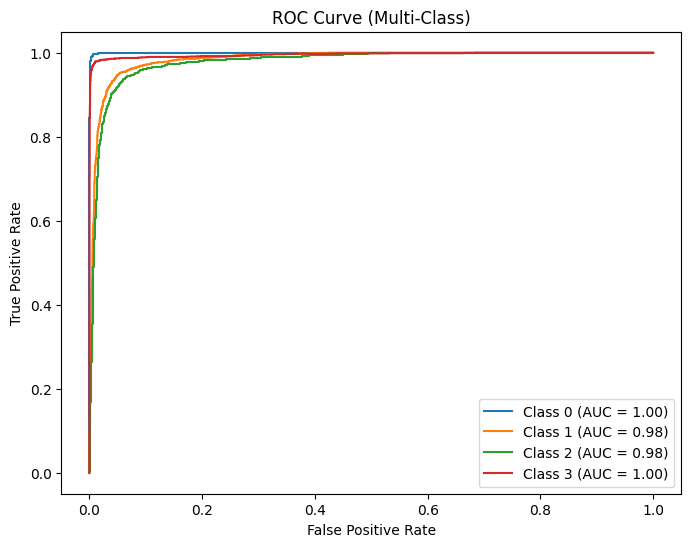

In [64]:
scoring_mae = make_scorer(mean_absolute_error, greater_is_better=False)
best_model, best_params = tune_evaluate(scoring_mae, search_spaces, train_X, train_y1, valid_X, valid_y1)

# Feature Selection

In [51]:
from sklearn.feature_selection import SequentialFeatureSelector, RFE
from sklearn.preprocessing import OneHotEncoder

In [52]:
def feature_selection_evaluate(n_features, train_X, train_y, test_X, test_y):
    model = LGBMOrdinal()
    selector = RFE(model, n_features_to_select=n_features, step=1)
    selector = selector.fit(train_X, train_y)
    selector.get_support()
    selector.transform(train_X).shape
    selected_features = train_X.columns[selector.support_]

    model.fit(train_X[selected_features], train_y)
    y_pred = model.predict(test_X[selected_features])
    y_pred_prob = model.predict_proba(test_X[selected_features])

    print("Selected features: ", selected_features)
    evaluate_results(y_pred, y_pred_prob, test_y)

    return selected_features

Selected features:  Index(['Weather_Day_of_Week_Saturday', 'Weather_Day_of_Week_Sunday',
       'Weather_Day_of_Week_Wednesday', 'End_Time', 'Distance(mi)',
       'Temperature(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Crossing', 'Stop',
       'Traffic_Signal', 'Duration', 'Region', 'State_Others', 'State_TX',
       'City_Charlotte', 'City_Los Angeles', 'City_Others', 'Weather_Year',
       'Weather_Month', 'Weather_Day', 'Weather_Hour'],
      dtype='object')
Accuracy: 0.338
Accuracy within 1 class: 0.643
F1-score (Macro): 0.2562722877761758
F1-score (Weighted): 0.426882660069184
Kendall's Tau: 0.1813602883622965
Weighted Kappa: 0.12394220950570722
              precision    recall  f1-score   support

           0       0.09      1.00      0.17        14
           1       0.94      0.31      0.47       828
           2       0.24      0.27      0.25       124
           3       0.07      0.91      0.13        34

    accu

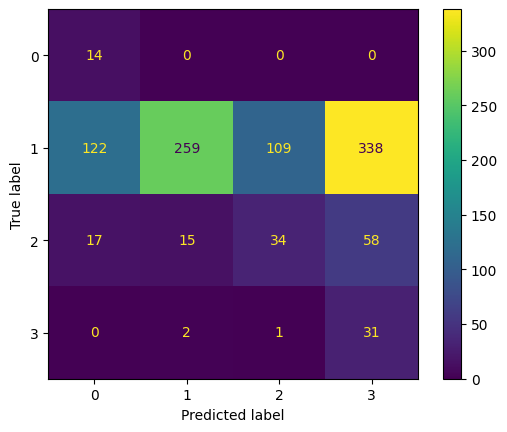

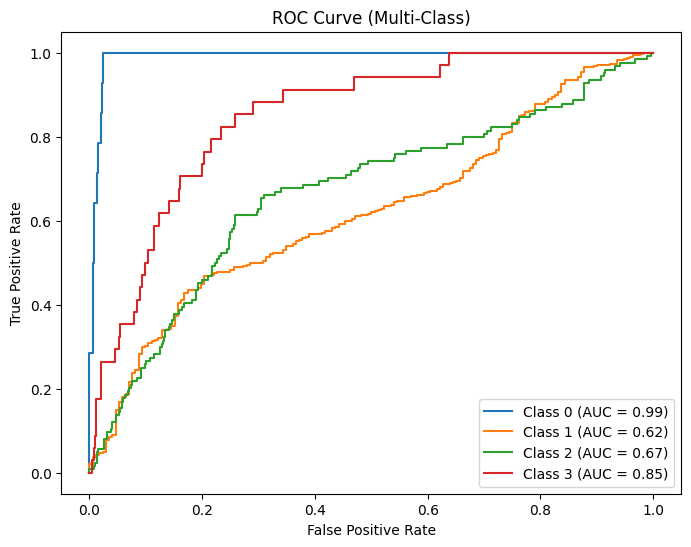

In [54]:
selected_features_25 = feature_selection_evaluate(25, train_X, train_y1, valid_X, valid_y1)

Selected features:  Index(['End_Time', 'Distance(mi)', 'Temperature(F)', 'Humidity(%)',
       'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)', 'Traffic_Signal',
       'Duration', 'Region', 'State_Others', 'Weather_Year', 'Weather_Month',
       'Weather_Day', 'Weather_Hour'],
      dtype='object')
Accuracy: 0.299
Accuracy within 1 class: 0.64
F1-score (Macro): 0.23702351348622583
F1-score (Weighted): 0.3751694543061315
Kendall's Tau: 0.1652200898735287
Weighted Kappa: 0.11459110116828242
              precision    recall  f1-score   support

           0       0.09      1.00      0.16        14
           1       0.94      0.26      0.41       828
           2       0.20      0.30      0.24       124
           3       0.08      0.94      0.14        34

    accuracy                           0.30      1000
   macro avg       0.33      0.63      0.24      1000
weighted avg       0.81      0.30      0.38      1000



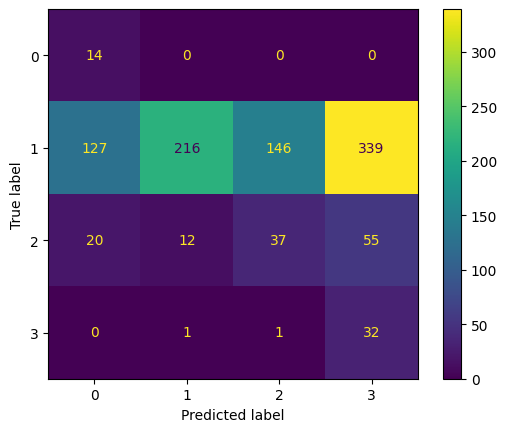

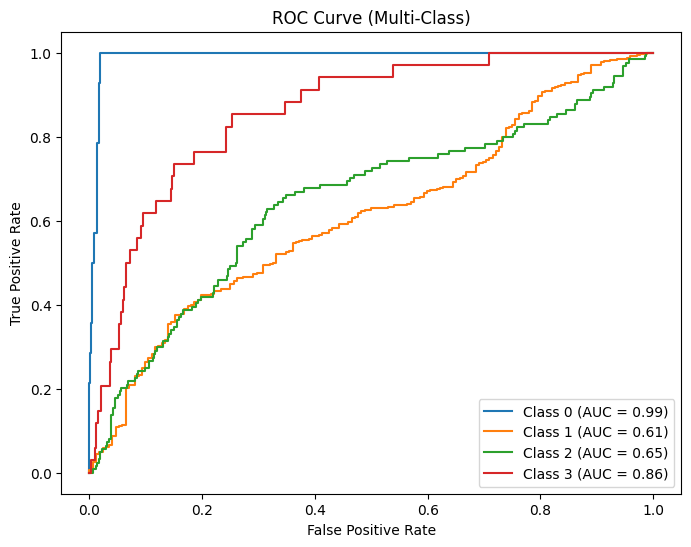

In [55]:
selected_features_15 = feature_selection_evaluate(15, train_X, train_y1, valid_X, valid_y1)

Selected features:  Index(['End_Time', 'Distance(mi)', 'Temperature(F)', 'Humidity(%)',
       'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Crossing', 'Stop', 'Traffic_Signal', 'Duration',
       'Region', 'State_Others', 'State_TX', 'City_Charlotte', 'Weather_Year',
       'Weather_Month', 'Weather_Day', 'Weather_Hour'],
      dtype='object')
Accuracy: 0.315
Accuracy within 1 class: 0.622
F1-score (Macro): 0.2481304828043211
F1-score (Weighted): 0.4006668651953206
Kendall's Tau: 0.16596019672739676
Weighted Kappa: 0.11412280137844255
              precision    recall  f1-score   support

           0       0.08      1.00      0.15        14
           1       0.94      0.28      0.43       828
           2       0.26      0.29      0.28       124
           3       0.07      0.91      0.13        34

    accuracy                           0.32      1000
   macro avg       0.34      0.62      0.25      1000
weighted avg       0.81      0.32      0.4

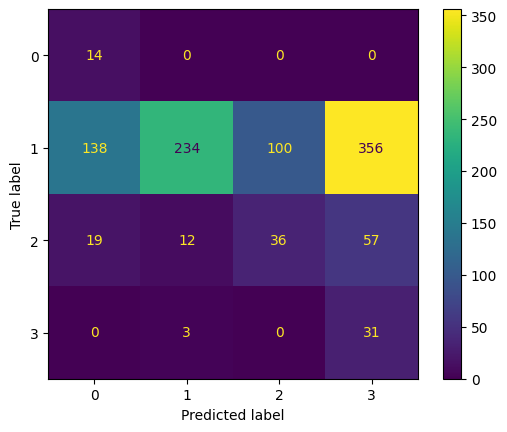

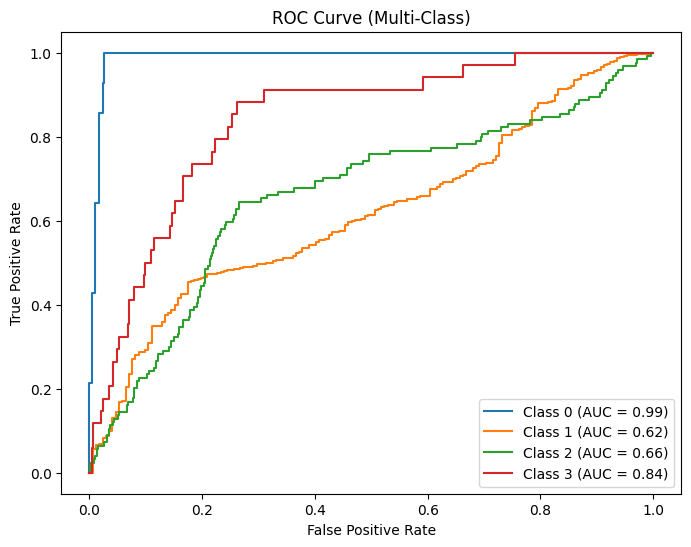

In [56]:
selected_features_20 = feature_selection_evaluate(20, train_X, train_y1, valid_X, valid_y1)

Selected features:  Index(['Weather_Day_of_Week_Saturday', 'Weather_Day_of_Week_Sunday',
       'Weather_Day_of_Week_Wednesday', 'End_Time', 'Distance(mi)',
       'Temperature(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Crossing', 'Station', 'Stop',
       'Traffic_Signal', 'Duration', 'Region', 'State_CA', 'State_Others',
       'State_TX', 'City_Charlotte', 'City_Los Angeles', 'City_Others',
       'Weather_Year', 'Weather_Month', 'Weather_Day', 'Weather_Hour'],
      dtype='object')
Accuracy: 0.328
Accuracy within 1 class: 0.636
F1-score (Macro): 0.2499562208808611
F1-score (Weighted): 0.41555265566546556
Kendall's Tau: 0.1676819347495743
Weighted Kappa: 0.11628205230969002
              precision    recall  f1-score   support

           0       0.09      1.00      0.16        14
           1       0.92      0.30      0.46       828
           2       0.24      0.27      0.25       124
           3       0.07      0.88     

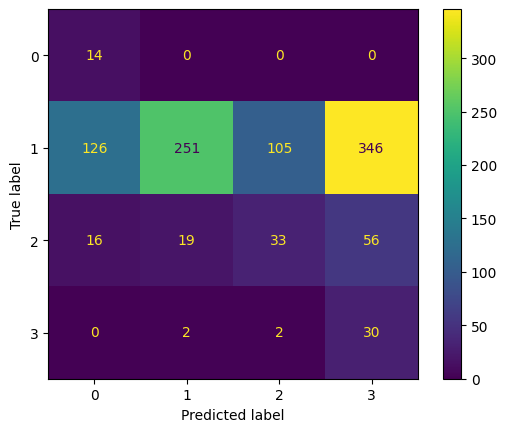

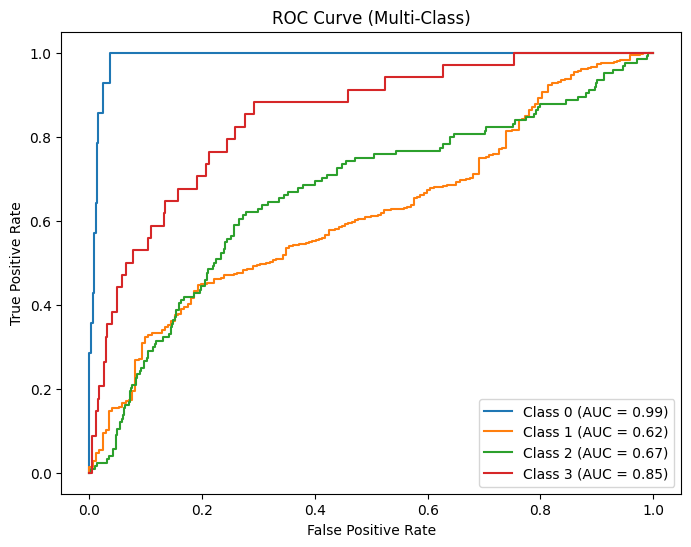

In [57]:
selected_features_27 = feature_selection_evaluate(27, train_X, train_y1, valid_X, valid_y1)

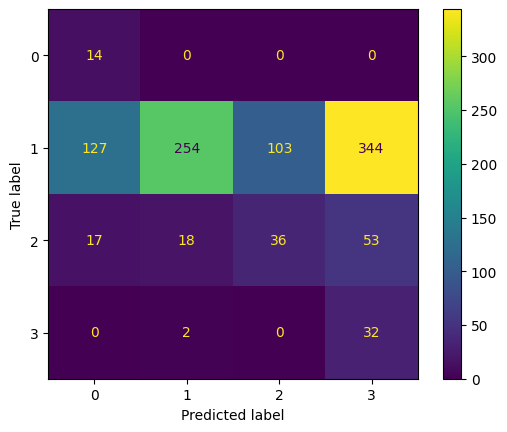

In [154]:
ConfusionMatrixDisplay.from_predictions(valid_y1, y_pred)

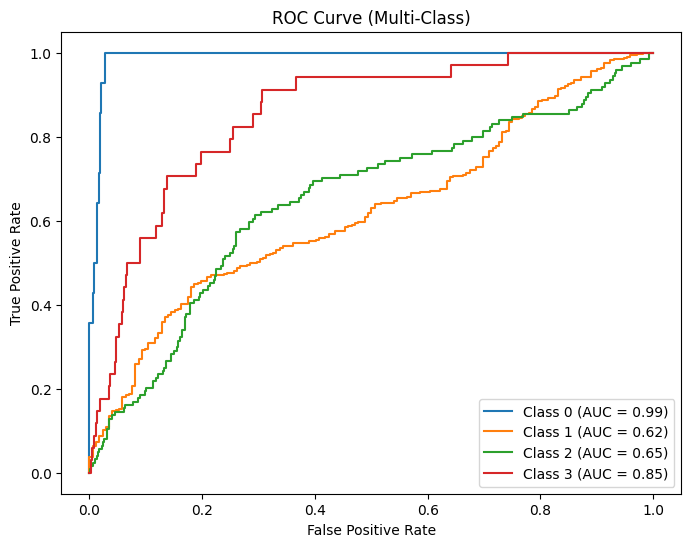

In [155]:
y_true_bin = label_binarize(valid_y1, classes=np.unique(valid_y1))

n_classes = y_true_bin.shape[1]
plt.figure(figsize=(8,6))

for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_true_bin[:, i], y_pred_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"Class {i} (AUC = {roc_auc:.2f})")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (Multi-Class)")
plt.legend()
plt.show()

# Feature Selection + Fine-tuning

Best optimzer score:  -1.539625
Best parameters:  OrderedDict([('colsample_bytree', 0.8935739197975247), ('learning_rate', 0.42465100827679286), ('max_depth', -1), ('n_estimators', 30), ('num_leaves', 255), ('reg_alpha', 6.687956238101294), ('reg_lambda', 0.5), ('subsample', 1.0), ('subsample_freq', 3)])
######### Evaluate Test Data Fit #########
Accuracy: 0.397
Accuracy within 1 class: 0.737
F1-score (Macro): 0.2658287446752178
F1-score (Weighted): 0.4857810145916659
Kendall's Tau: 0.14973320143493146
Weighted Kappa: 0.1214118003484056
              precision    recall  f1-score   support

           0       0.11      1.00      0.21        14
           1       0.88      0.40      0.55       828
           2       0.14      0.21      0.17       124
           3       0.08      0.71      0.14        34

    accuracy                           0.40      1000
   macro avg       0.30      0.58      0.27      1000
weighted avg       0.75      0.40      0.49      1000



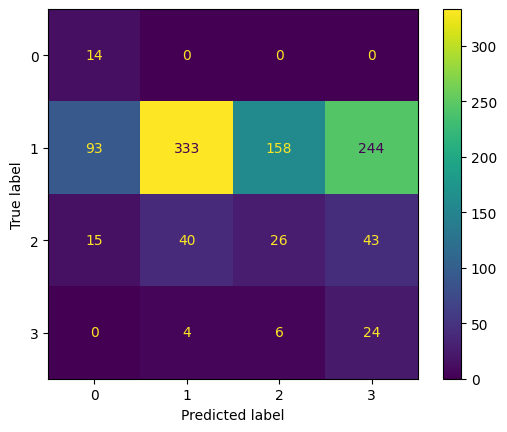

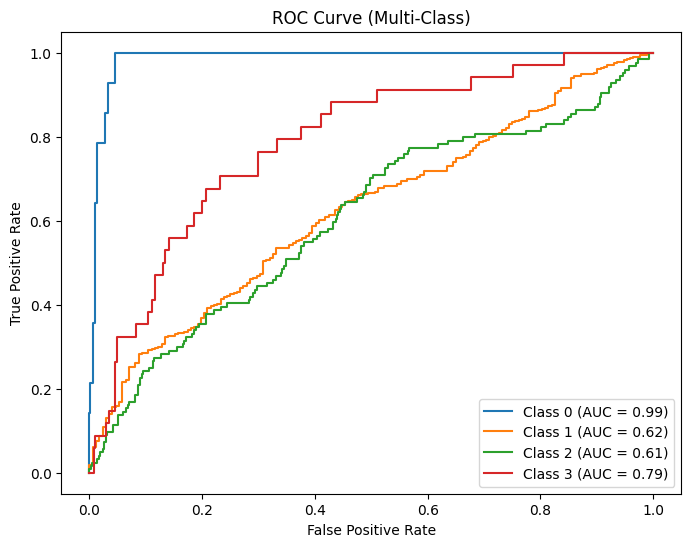

######### Evaluate Train Data Fit #########
Accuracy: 0.731
Accuracy within 1 class: 0.94275
F1-score (Macro): 0.7162151387948241
F1-score (Weighted): 0.716215138794824
Kendall's Tau: 0.7819413849202148
Weighted Kappa: 0.8339414393870291
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      2000
           1       0.70      0.60      0.65      2000
           2       0.66      0.43      0.52      2000
           3       0.67      0.93      0.78      2000

    accuracy                           0.73      8000
   macro avg       0.73      0.73      0.72      8000
weighted avg       0.73      0.73      0.72      8000



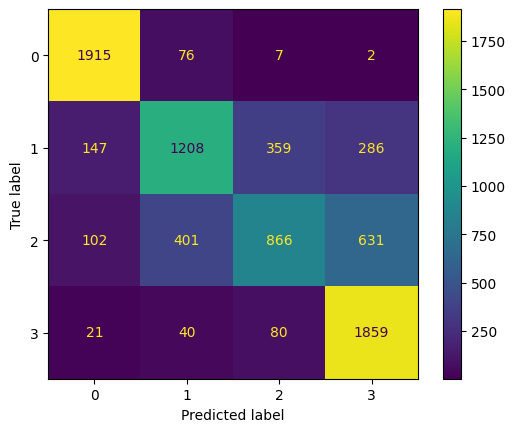

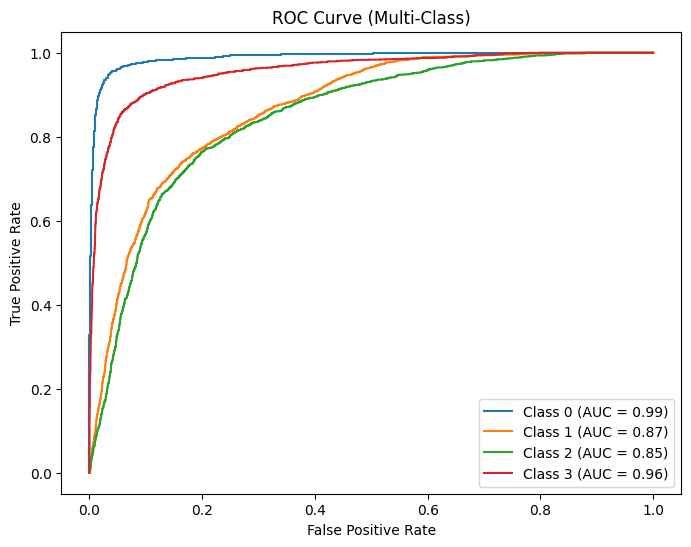

In [65]:
scoring_mse = make_scorer(mean_squared_error, greater_is_better=False)

scoring_mae = make_scorer(mean_absolute_error, greater_is_better=False)

search_spaces = {
    'learning_rate': Real(0.01, 1.0, 'log-uniform'),
    'n_estimators': Integer(30, 5000),
    'num_leaves': Integer(2, 512),                       # Maximum tree leaves for base learners
    'max_depth': Integer(-1, 256),                       # Maximum tree depth for base learners, <=0 means no limit
    'subsample': Real(0.01, 1.0, 'uniform'),             # Subsample ratio of the training instance
    'subsample_freq': Integer(1, 10),                    # Frequency of subsample, <=0 means no enable
    'colsample_bytree': Real(0.01, 1.0, 'uniform'),      # Subsample ratio of columns when constructing each tree
    'reg_lambda': Real(0.5, 100.0, 'log-uniform'),      # L2 regularization
    'reg_alpha': Real(0.5, 100.0, 'log-uniform'),       # L1 regularization
   }

best_model_mse, best_model_params = tune_evaluate(scoring_mse, search_spaces, train_X[selected_features_25], train_y1, valid_X[selected_features_25], valid_y1)

Best optimzer score:  -0.9891249999999999
Best parameters:  OrderedDict([('colsample_bytree', 0.8416990485720899), ('learning_rate', 0.5215400922362969), ('max_depth', 97), ('n_estimators', 2587), ('num_leaves', 512), ('reg_alpha', 0.5), ('reg_lambda', 0.5), ('subsample', 1.0), ('subsample_freq', 4)])
######### Evaluate Test Data Fit #########
Accuracy: 0.326
Accuracy within 1 class: 0.703
F1-score (Macro): 0.2361749132069534
F1-score (Weighted): 0.4037038038775869
Kendall's Tau: 0.09171372051142011
Weighted Kappa: 0.0863618637517426
              precision    recall  f1-score   support

           0       0.10      1.00      0.18        14
           1       0.85      0.31      0.45       828
           2       0.13      0.23      0.16       124
           3       0.08      0.79      0.15        34

    accuracy                           0.33      1000
   macro avg       0.29      0.58      0.24      1000
weighted avg       0.72      0.33      0.40      1000



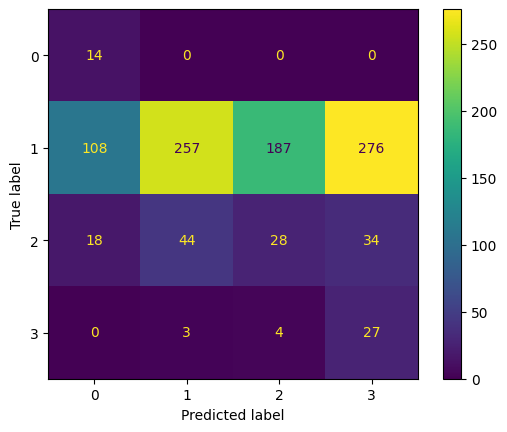

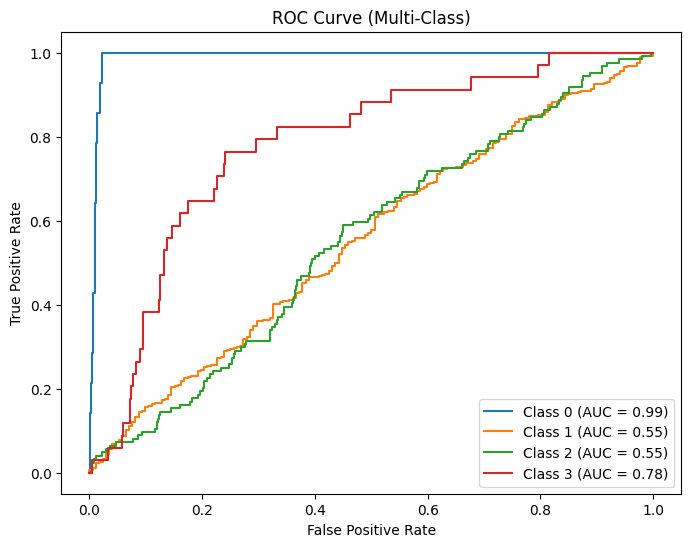

######### Evaluate Train Data Fit #########
Accuracy: 0.99975
Accuracy within 1 class: 1.0
F1-score (Macro): 0.9997500312109512
F1-score (Weighted): 0.9997500312109511
Kendall's Tau: 0.9998333541562533
Weighted Kappa: 0.9998999899989999
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2000
           1       1.00      1.00      1.00      2000
           2       1.00      1.00      1.00      2000
           3       1.00      1.00      1.00      2000

    accuracy                           1.00      8000
   macro avg       1.00      1.00      1.00      8000
weighted avg       1.00      1.00      1.00      8000



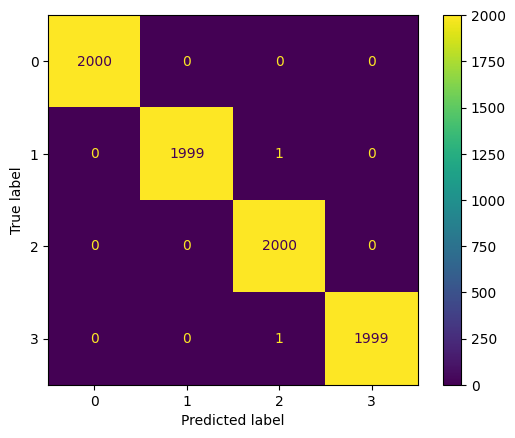

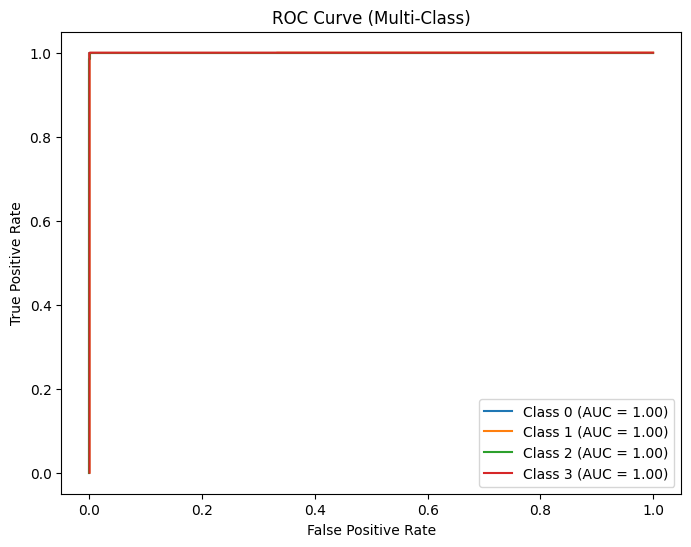

In [67]:
best_model_mae, best_params_mae = tune_evaluate(scoring_mae, search_spaces, train_X[selected_features_25], train_y1, valid_X[selected_features_25], valid_y1)

/Users/liusiyi/Desktop/BT4240/Group Project/.venv/lib/python3.10/site-packages/ordinalgbt/loss.py:70: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
/Users/liusiyi/Desktop/BT4240/Group Project/.venv/lib/python3.10/site-packages/ordinalgbt/loss.py:70: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
/Users/liusiyi/Desktop/BT4240/Group Project/.venv/lib/python3.10/site-packages/ordinalgbt/loss.py:70: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
/Users/liusiyi/Desktop/BT4240/Group Project/.venv/lib/python3.10/site-packages/ordinalgbt/loss.py:70: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
/Users/liusiyi/Desktop/BT4240/Group Project/.venv/lib/python3.10/site-packages/ordinalgbt/loss.py:70: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


Best optimzer score:  0.15593427558916984
Best parameters:  OrderedDict([('colsample_bytree', 1.0), ('learning_rate', 1.0), ('max_depth', 256), ('n_estimators', 3111), ('num_leaves', 300), ('reg_alpha', 0.5), ('reg_lambda', 0.5), ('subsample', 1.0), ('subsample_freq', 8)])
######### Evaluate Test Data Fit #########
Accuracy: 0.29
Accuracy within 1 class: 0.699
F1-score (Macro): 0.220283544453165
F1-score (Weighted): 0.36195410650448223
Kendall's Tau: 0.08585987593021235
Weighted Kappa: 0.07953748885576817
              precision    recall  f1-score   support

           0       0.07      1.00      0.12        14
           1       0.84      0.26      0.40       828
           2       0.18      0.31      0.23       124
           3       0.07      0.71      0.13        34

    accuracy                           0.29      1000
   macro avg       0.29      0.57      0.22      1000
weighted avg       0.72      0.29      0.36      1000



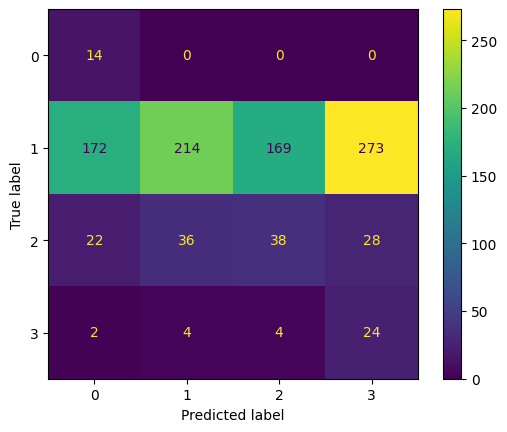

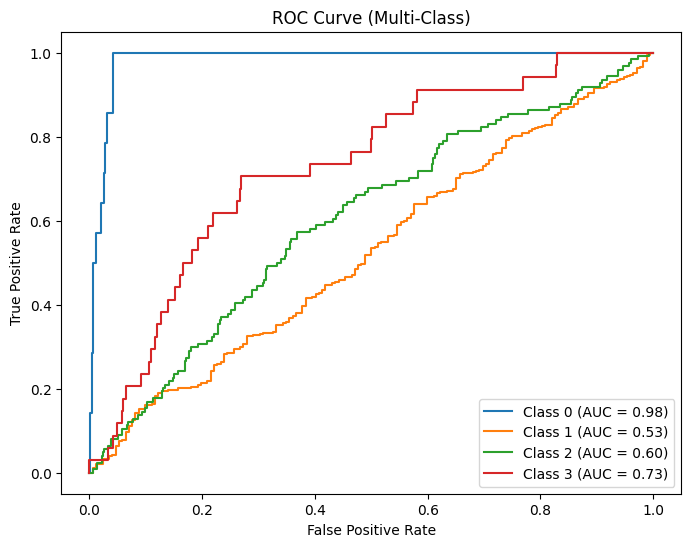

######### Evaluate Train Data Fit #########
Accuracy: 0.99975
Accuracy within 1 class: 1.0
F1-score (Macro): 0.9997500312109512
F1-score (Weighted): 0.9997500312109511
Kendall's Tau: 0.9998333541562533
Weighted Kappa: 0.9998999899989999
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2000
           1       1.00      1.00      1.00      2000
           2       1.00      1.00      1.00      2000
           3       1.00      1.00      1.00      2000

    accuracy                           1.00      8000
   macro avg       1.00      1.00      1.00      8000
weighted avg       1.00      1.00      1.00      8000



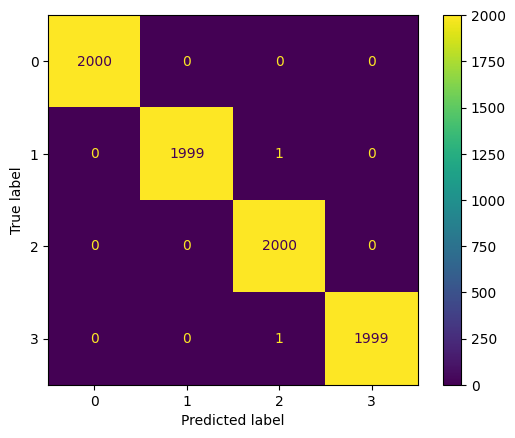

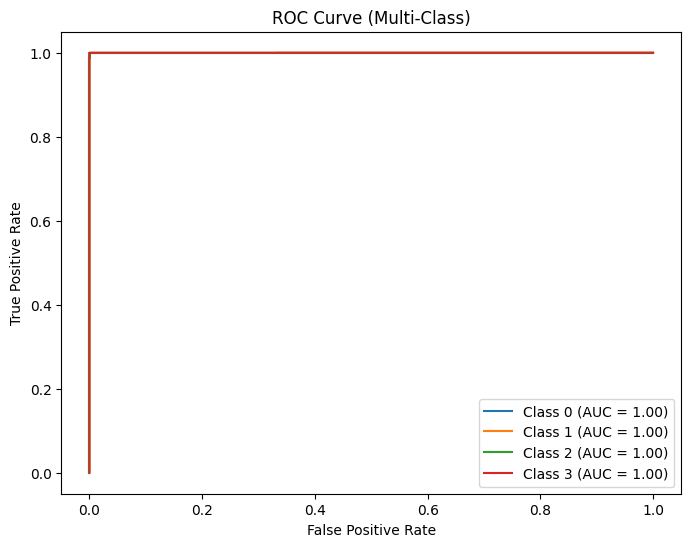

In [68]:
scoring_f1 = make_scorer(f1_score, average="macro", greater_is_better=True)
best_model_f1, best_params_f1 = tune_evaluate(scoring_f1, search_spaces, train_X[selected_features_25], train_y1, valid_X[selected_features_25], valid_y1)

# Evaluate on Test Set

Accuracy: 0.413
Accuracy within 1 class: 0.724
F1-score (Macro): 0.2526075673250326
F1-score (Weighted): 0.5176336317672336
Kendall's Tau: 0.09427784269530032
Weighted Kappa: 0.06339991108894938
              precision    recall  f1-score   support

           0       0.06      1.00      0.11         6
           1       0.90      0.41      0.57       857
           2       0.20      0.34      0.25       119
           3       0.04      0.72      0.08        18

    accuracy                           0.41      1000
   macro avg       0.30      0.62      0.25      1000
weighted avg       0.80      0.41      0.52      1000



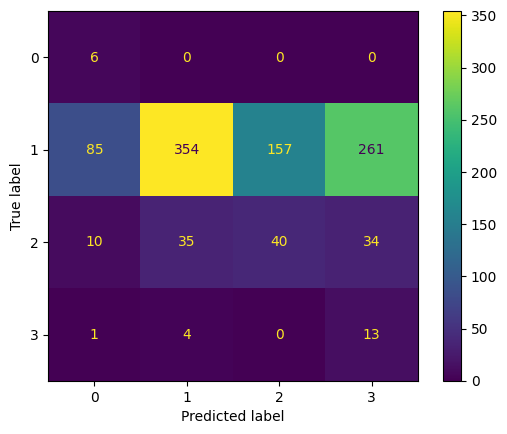

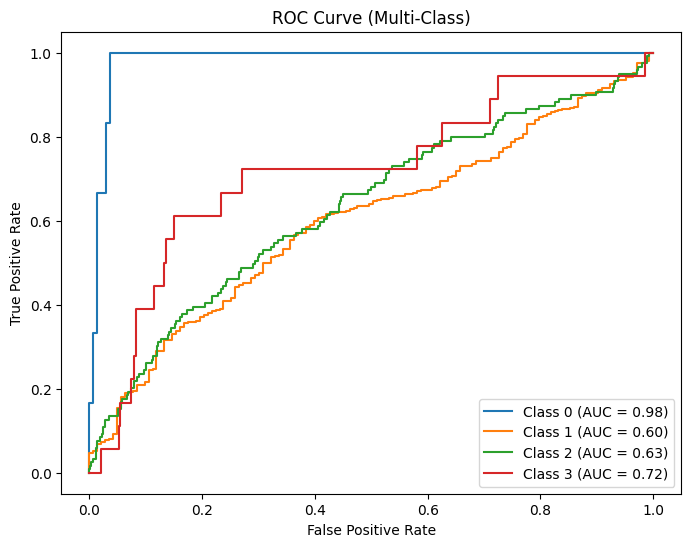

In [ ]:
## Evaluate Fine-tuned model + selected features
y_pred = best_model_mse.predict(test_X[selected_features_25])
y_pred_prob = best_model_mse.predict_proba(test_X[selected_features_25])

evaluate_results(y_pred, y_pred_prob, test_y1)

In [ ]:
# OrderedDict([('colsample_bytree', 1.0), ('learning_rate', 0.8389367929885553), ('max_depth', 137), ('n_estimators', 1404), ('num_leaves', 311), ('reg_alpha', 14.709900732508682), ('reg_lambda', 0.8698434487970176), ('subsample', 1.0), ('subsample_freq', 5)])

Accuracy: 0.416
Accuracy within 1 class: 0.74
F1-score (Macro): 0.24288155658879304
F1-score (Weighted): 0.5205894828055527
Kendall's Tau: 0.08444362925625352
Weighted Kappa: 0.061163581102025355
              precision    recall  f1-score   support

           0       0.05      0.83      0.10         6
           1       0.90      0.42      0.58       857
           2       0.17      0.29      0.21       119
           3       0.04      0.72      0.08        18

    accuracy                           0.42      1000
   macro avg       0.29      0.57      0.24      1000
weighted avg       0.79      0.42      0.52      1000



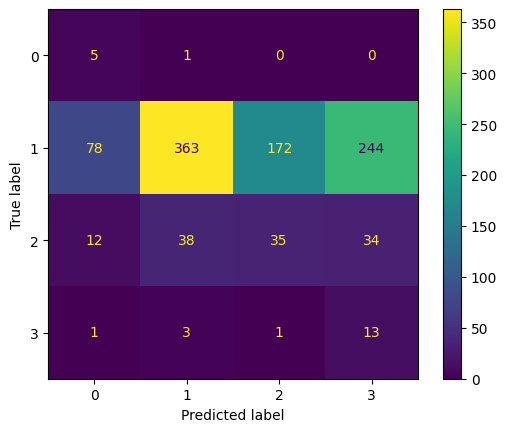

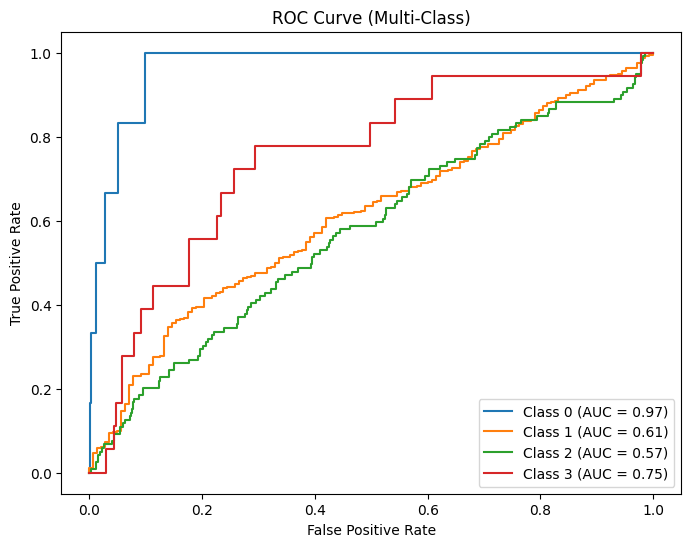

In [ ]:
## Evaluate Fine-tuned model + all features

model = LGBMOrdinal(
    colsample_bytree=1.0,
    learning_rate=0.8389367929885553,
    max_depth=137,
    n_estimators=1404,
    num_leaves=311,
    reg_alpha=14.709900732508682,
    reg_lambda=0.8698434487970176,
    subsample=1.0,
    subsample_freq=5
)

model.fit(train_X, train_y1)
y_pred = model.predict(test_X)
y_pred_prob = model.predict_proba(test_X)

evaluate_results(y_pred, y_pred_prob, test_y1)